In [1]:
'''
【课程1.3】 对比分析

对比分析——另个相互联系的指标进行比较

绝对数比较（相减） / 相对数比较（相除）
结构分析、比例分析、空间比较分析、动态对比分析

'''

'\n【课程1.3】 对比分析\n\n对比分析——另个相互联系的指标进行比较\n\n绝对数比较（相减） / 相对数比较（相除）\n结构分析、比例分析、空间比较分析、动态对比分析\n\n'

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

                A_sale      B_sale
2019-06-01  957.256410  273.714062
2019-06-02   32.875864  900.821780
2019-06-03  452.696221  546.417642
2019-06-04  310.507884  658.648289
2019-06-05  419.853745  296.253908


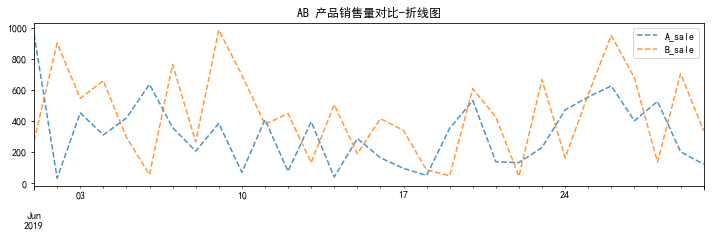

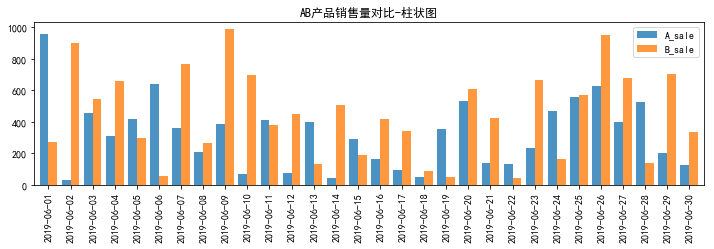

In [14]:
# 1.绝对数比较——相减
# 相互对比的指标在两级上不能差别过大
# (1) 折线图比较
# (2) 多系列柱状图比较

# 创建数据- 30天内A/B产品的日销售量
data = pd.DataFrame(np.random.rand(30,2)*1000,
                   columns=['A_sale','B_sale'],
                   index=pd.period_range('20190601','20190630'))
print(data.head())

# 折线图比较
data.plot(kind='line',
         style='--',
         alpha=0.8,
         figsize=(12,3),
         title='AB 产品销售量对比-折线图')

# 多系列柱状图表示
data.plot(kind='bar',
         width=0.8,
         alpha=0.8,
         figsize=(12,3),
         title='AB产品销售量对比-柱状图')

[Text(0, 0, '2019-06-01'),
 Text(0, 0, '2019-06-07'),
 Text(0, 0, '2019-06-13'),
 Text(0, 0, '2019-06-19'),
 Text(0, 0, '2019-06-25')]

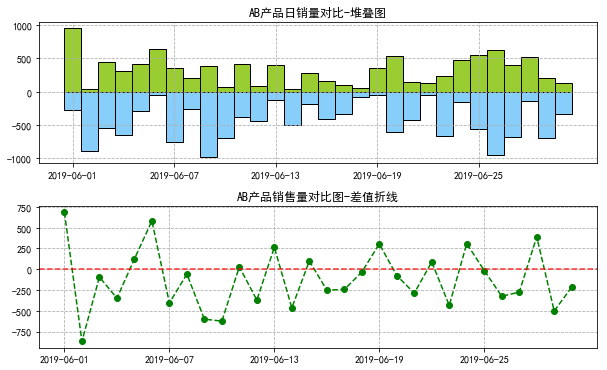

In [32]:
# 1、绝对数比较——相减
# （3）柱状图堆叠图+差值折线图比较

fig3 = plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace=0.3)
# 创建子图及间隔设置

ax1 = fig3.add_subplot(2,1,1)
x = range(len(data))
y1 = data['A_sale']
y2 = -data['B_sale']
plt.bar(x,y1,width = 1,facecolor='yellowgreen',edgecolor='k')
plt.bar(x,y2,width = 1, facecolor = 'lightskyblue', edgecolor='k')
plt.grid(linestyle='--')
plt.title('AB产品日销量对比-堆叠图')
plt.xticks(range(0,30,6))
ax1.set_xticklabels(data.index[::6])

ax2 = fig3.add_subplot(2,1,2)
y3 = data['A_sale'] - data['B_sale']
plt.plot(x,y3,'--go')
plt.axhline(0,color='r',linestyle='--',alpha=0.8) # 添加y轴参考线
plt.grid(linestyle='--')
plt.title('AB产品销售量对比图-差值折线')
plt.xticks(range(0,30,6))
ax2.set_xticklabels(data.index[::6])

In [34]:
# 2、相对数比较 —— 相除
# 有联系的指标综合计算后的对比，数值为相对数
# 结构分析、比例分析、空间比较分析、动态对比分析
# （1）结构分析
# 在分组基础上， 各组总量指标与粽子的总量指标对比，计算出各组数量在总量中所占比重
# 反映总体的内部结构

# 创建数据： 30 天内A/B产品的日销售额
# A/B 产品的销售额量级不同
data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,'B_sale':np.random.rand(30)*200},
                   index=pd.period_range('20190601','20190630'))
#print(data.head())
print('**'*30)

# 计算每天的营收占比
data['A_per'] = data['A_sale'] / data['A_sale'].sum()
data['B_per'] = data['B_sale'] / data['B_sale'].sum()

# 转换为百分数
data['A_per%'] = data['A_per'].apply(lambda x: "%.2f%%" %(x*100))
data['B_per%'] = data['B_per'].apply(lambda x: "%.2f%%" %(x*100))
print(data.head())

************************************************************
                A_sale      B_sale     A_per     B_per A_per% B_per%
2019-06-01  185.312776   15.961522  0.011575  0.005304  1.16%  0.53%
2019-06-02  875.687833  184.271023  0.054697  0.061230  5.47%  6.12%
2019-06-03  753.008252  131.874204  0.047034  0.043819  4.70%  4.38%
2019-06-04  129.906701  154.058149  0.008114  0.051190  0.81%  5.12%
2019-06-05  587.326938  184.055059  0.036685  0.061158  3.67%  6.12%
